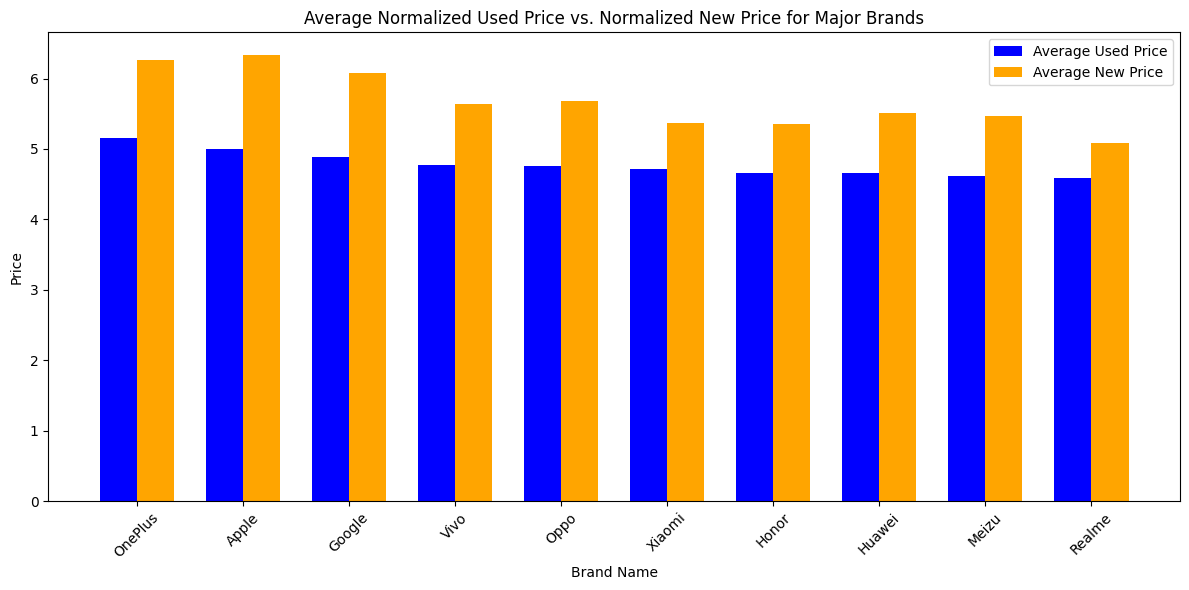

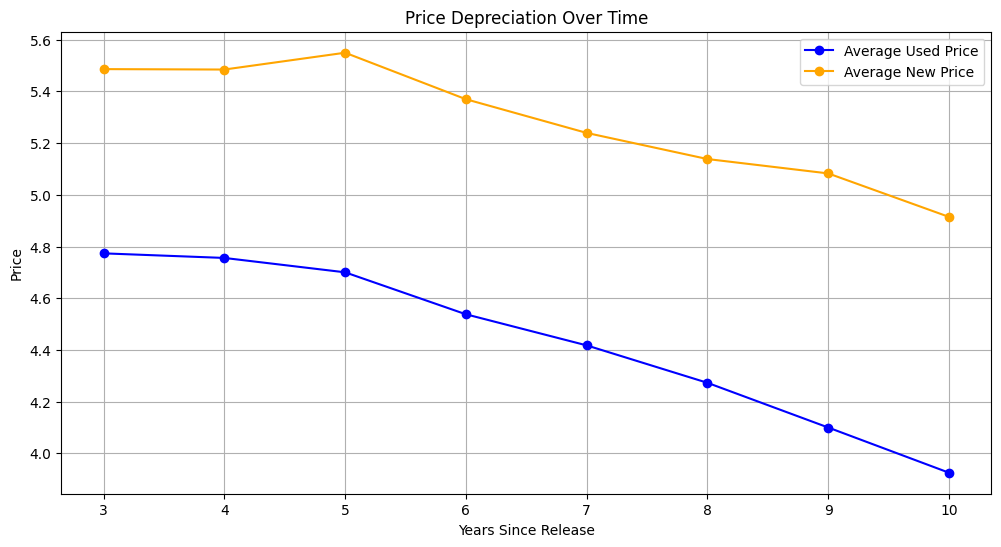

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("used_device_data.csv")  

# Pricing Insights
def pricing_insights(data):
    # Check for required columns
    required_columns = ['brand_name', 'normalized_used_price', 'normalized_new_price', 'release_year']
    
    for col in required_columns:
        if col not in data.columns:
            raise ValueError(f"Missing column: {col}")

    # Drop rows with missing values in the relevant columns
    data = data.dropna(subset=required_columns)

    # Calculate average normalized used price and new price for major brands
    brand_price_comparison = data.groupby('brand_name').agg(
        average_used_price=('normalized_used_price', 'mean'),
        average_new_price=('normalized_new_price', 'mean')  # Updated to use normalized_new_price
    ).reset_index()

    # Filter for major brands (top 10 based on average used price)
    major_brands = brand_price_comparison.nlargest(10, 'average_used_price')

    # Plotting the price comparison
    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    index = range(len(major_brands))

    plt.bar(index, major_brands['average_used_price'], bar_width, label='Average Used Price', color='blue')
    plt.bar([i + bar_width for i in index], major_brands['average_new_price'], bar_width, label='Average New Price', color='orange')

    plt.xlabel('Brand Name')
    plt.ylabel('Price')
    plt.title('Average Normalized Used Price vs. Normalized New Price for Major Brands')
    plt.xticks([i + bar_width / 2 for i in index], major_brands['brand_name'], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Insights on price depreciation over time
    data['years_since_release'] = 2023 - data['release_year']  # Assuming the current year is 2023
    price_depreciation = data.groupby('years_since_release').agg(
        average_used_price=('normalized_used_price', 'mean'),
        average_new_price=('normalized_new_price', 'mean')  # Updated to use normalized_new_price
    ).reset_index()

    # Plotting price depreciation over time
    plt.figure(figsize=(12, 6))
    plt.plot(price_depreciation['years_since_release'], price_depreciation['average_used_price'], marker='o', label='Average Used Price', color='blue')
    plt.plot(price_depreciation['years_since_release'], price_depreciation['average_new_price'], marker='o', label='Average New Price', color='orange')

    plt.xlabel('Years Since Release')
    plt.ylabel('Price')
    plt.title('Price Depreciation Over Time')
    plt.legend()
    plt.grid()
    plt.show()

# Call the pricing insights function
pricing_insights(data)